<a href="https://colab.research.google.com/github/anyacosta/tesis-maestria/blob/master/Etiquetas5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/TFM/TL/Set_100_picts")

In [3]:
!ls

Test  Train


In [6]:
# Directory with our training bebe pictures
train_bebe_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Set_100_picts/Train/Bebe')

# Directory with our training infante pictures
train_infante_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Set_100_picts/Train/Infante')

# Directory with our training bebe pictures
train_adolescente_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Set_100_picts/Train/Adolescente')

# Directory with our training infante pictures
train_adulto_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Set_100_picts/Train/Adulto')

# Directory with our training senior pictures
train_senior_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Set_100_picts/Train/Senior')

# Directory with our test child pictures
test_bebe_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Set_100_picts/Test/Bebe')

# Directory with our test adult pictures
test_infante_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Set_100_picts/Test/Infante')

# Directory with our test child pictures
test_adolescente_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Set_100_picts/Test/Adolescente')

# Directory with our test adult pictures
test_adulto_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Set_100_picts/Test/Adulto')

# Directory with our test adult pictures
test_senior_dir = os.path.join('/content/drive/MyDrive/TFM/TL/Set_100_picts/Test/Senior')

In [7]:
train_bebe_names = os.listdir(train_bebe_dir)
print(train_bebe_names[:10])

train_infante_names = os.listdir(train_infante_dir)
print(train_infante_names[:10])

train_adolescente_names = os.listdir(train_adolescente_dir)
print(train_adolescente_names[:10])

train_adulto_names = os.listdir(train_adulto_dir)
print(train_adulto_names[:10])

train_senior_names = os.listdir(train_senior_dir)
print(train_senior_names[:10])

test_bebe_names = os.listdir(test_bebe_dir)
print(test_bebe_names[:10])

test_infante_names = os.listdir(test_infante_dir)
print(test_infante_names[:10])

test_adolescente_names = os.listdir(test_adolescente_dir)
print(test_adolescente_names[:10])

test_adulto_names = os.listdir(test_adulto_dir)
print(test_adulto_names[:10])

test_senior_names = os.listdir(test_senior_dir)
print(test_senior_names[:10])

['images15 (5).jpg', 'images15 (4).jpg', 'images14 (9).jpg', 'images14 (6).jpg', 'images12.jpg', 'images13 (11).jpg', 'images13 (7).jpg', 'images14 (2).jpg', 'images13 (8).jpg', 'images13 (4).jpg']
['infante (273).jpg', 'infante (272).jpg', 'infante (271).jpg', 'infante (27).jpg', 'infante (26).jpg', 'infante (25).jpg', 'infante (23).jpg', 'infante (22).jpg', 'infante (24).jpg', 'infante (21).jpg']
['adolescente (106).jpg', 'adolescente (104).jpg', 'adolescente (103).jpg', 'adolescente (102).jpg', 'adolescente (105).jpg', 'adolescente (101).jpg', 'adolescente (100).jpg', 'adolescente (140).jpg', 'adolescente (139).jpg', 'adolescente (138).jpg']
['adulto (33).jpg', 'adulto (31).jpg', 'adulto (28).jpg', 'adulto (27).jpg', 'adulto (105).jpg', 'adulto (22).jpg', 'adulto (103).jpg', 'adulto (104).jpg', 'adulto (102).jpg', 'adulto (24).jpg']
['senior (22).jpg', 'senior (112).jpg', 'senior (111).jpg', 'senior (110).jpg', 'senior (108).jpg', 'senior (106).jpg', 'senior (102).jpg', 'senior (107

In [8]:
print('total training bebe images:', len(os.listdir(train_bebe_dir)))
print('total training adulto images:', len(os.listdir(train_adulto_dir)))
print('total validation bebe images:', len(os.listdir(test_bebe_dir)))
print('total validation adulto images:', len(os.listdir(test_adulto_dir)))

total training bebe images: 80
total training adulto images: 85
total validation bebe images: 20
total validation adulto images: 20


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [13]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/TFM/TL/Set_100_picts/Train',  # This is the source directory for training images
        classes = ['Bebe', 'Infante', 'Adolescente' , 'Adulto' , 'Senior'],
        target_size=(200,200),  # All images will be resized to 200x200
        batch_size=604)

Found 604 images belonging to 5 classes.


In [17]:
test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/TFM/TL/Set_100_picts/Test',  # This is the source directory for training images
        classes = ['Bebe', 'Infante', 'Adolescente' , 'Adulto' , 'Senior'],
        target_size=(200,200),  # All images will be resized to 200x200
        batch_size=100,
        shuffle=False)

Found 100 images belonging to 5 classes.


In [18]:
train_generator.class_indices

test_generator.class_indices

{'Bebe': 0, 'Infante': 1, 'Adolescente': 2, 'Adulto': 3, 'Senior': 4}

In [23]:
import keras
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [20]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.compat.v1.Session(config=config)

In [21]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(200, 200, 3)))
model.add(tf.keras.layers.Flatten())


model.add(Dense(512,activation='relu')),
model.add(Dense(256,activation='relu')),

model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [24]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

11501568/11490434 [==============================] - 0s 0us/step


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 512)               32113152  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 34,502,721
Trainable params: 32,244,737
Non-trainable params: 2,257,984
____________________________________

In [36]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [39]:
history = model.fit(train_generator,
      steps_per_epoch=26,  
      epochs=20,
      verbose=1,
      validation_data = test_generator,
      validation_steps=13)

Epoch 1/20
 1/26 [>.............................] - ETA: 8:22 - loss: 0.8432 - accuracy: 0.8000

26/26 [==============================] - 24s 170ms/step - loss: 0.8432 - accuracy: 0.8000 - val_loss: 2.0447 - val_accuracy: 0.8000


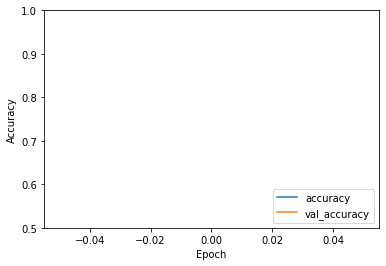

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [33]:
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = '/content/drive/MyDrive/TFM/TL/Prueba/Entrenamiento/saved_model'
save_model(model, filepath)

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.models import Sequential, save_model, load_model
filepath = '/content/drive/MyDrive/TFM/TL/Prueba/Entrenamiento/saved_model/'
# Load the model
model = load_model(filepath, compile = True)

In [ ]:
model.evaluate(test_generator)

In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
preds = model.predict(test_generator,
                      verbose=1)

print(preds[10])

print("prediction shape:", preds.shape)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Generate the predictions for each image
classes = np.greater(preds, .5)
print(1*classes)

#Predictions for first childs
print(1*classes[:5]) 
print(test_generator.classes[:5])

#Predictions for first adults
print(1*classes[956:960]) 
print(test_generator.classes[956:960])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#The confusion_matrix displays a table showing the true positives, true negatives, false positives, and false negatives.
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, classes)
print(cm)

print('Precision: %.5f' % precision_score(test_generator.classes, classes))
print('Recall: %.5f' % recall_score(test_generator.classes, classes))

NPV = cm[0][1]/(cm[0][1]+cm[1][0])
print('Specificity: %.5f' % NPV)

print('Accuracy: %.5f' % accuracy_score(test_generator.classes, classes))
print('F1 Score: %.5f' % f1_score(test_generator.classes, classes))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fpr, tpr, _ = roc_curve(test_generator.classes, preds)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()